# Avengers Analysis

Dalam analisis anggota Avengers ini Saya menggunakan dataset dari github fivethirtyeight yang dapat diakses <a href="https://github.com/fivethirtyeight/data/tree/master/avengers">disini</a>.
<p>Dataset tersebut merinci kematian karakter buku komik Marvel dari mereka bergabung dengan Avengers sampai 30 April 2015, seminggu sebelum Secret Wars # 1. Berikut penjelasan tiap kolomnya</p>
<ul>
<li>`URL`| URL karakter di Marvel Wikia</li>
<li>`Name/Alias` | Nama lengkap atau alias dari karakter</li>
<li>`Appearances` | Jumlah tampil karakter sampai 30 April 2015 </li>
<li>`Current?` | Apakah karakter masih terafliasi dengan team Avengers?</li>
<li>`Gender` | Jenis kelamin dari karakter</li>
<li>`Probationary` | Terkadang karakter diberi status percobaan sebagai Anggota Avengers, dan kolom ini menyebutkan tanggalnya</li>
<li>`Full/Reserve` | Bulan dan tahun karakter diperkenalkan sebagai anggota penuh atau cadangan dari Avengers</li>
<li>`Year` | Tahun karakter diperkenalkan sebagai anggota penuh atau cadangan Avengers</li>
<li>`Years since joining` | 2015 dikurangi 'Year'</li>
<li>`Honorary` | Status anggota, Apakah anggota "Honorary", "Academy", atau "Full"</li>
<li>`Death1` | 'YES' jika meninggal, 'NO' Jika Tidak. </li>
<li>`Return1` | 'YES' jika hidup kembali dari kematian pertama, 'NO' jika tidak, Kosong jika tidak dapat diterapkan</li>
<li>`Death2` | 'YES' jika mati setelah kebangkitan pertama, 'NO' jika tidak, Kosong jika tidak dapat diterapkan</li>
<li>`Return2` | 'YES' jika hidup kembali dari kematian kedua, 'NO' jika tidak, Kosong jika tidak dapat diterapkan</li>
<li>`Death3` | 'YES' jika mati setelah kebangkitan kedua, 'NO' jika tidak, Kosong jika tidak dapat diterapkan</li>
<li>`Return3` | 'YES' jika hidup kembali dari kematian ketiga, 'NO' jika tidak, Kosong jika tidak dapat diterapkan</li>
<li>`Death4` | 'YES' jika mati setelah kebangkitan ketiga, 'NO' jika tidak, Kosong jika tidak dapat diterapkan</li>
<li>`Return4` | 'YES' jika hidup kembali dari kematian keempat, 'NO' jika tidak, Kosong jika tidak dapat diterapkan</li>
<li>`Death5` | 'YES' jika mati setelah kebangkitan keempat, 'NO' jika tidak, Kosong jika tidak dapat diterapkan</li>
<li>`Return5` | 'YES' jika hidup kembali dari kematian kelima, 'NO' jika tidak, Kosong jika tidak dapat diterapkan</li>
<li>`Notes` | Deskripsi dari kematian dan kebangkitan.
</ul>

| CATATAN: Ada penyesuaian kolom 'Year' karena ada beberapa anggota yang belum diinput data sehingga valuenya default "1990" mengakibatkan kolom 'Years since joining' kurang akurat. Data kolom 'Year' Saya perbaharui dengan disesuaikan dengan tahun "First Appereance" pada URL anggota/karakter. Selebihnya analisis menggunakan data seadanya ! |
| --- |

<h2>Setup Dan Load Dataset</h2>

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
avengers = pd.read_csv('avengers.csv', encoding='latin-1')

<h2>Informasi Dataset</h2>

In [4]:
avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
URL                            173 non-null object
Name/Alias                     163 non-null object
Appearances                    173 non-null int64
Current?                       173 non-null object
Gender                         173 non-null object
Probationary Introl            15 non-null object
Full/Reserve Avengers Intro    159 non-null object
Year                           173 non-null int64
Years since joining            173 non-null int64
Honorary                       173 non-null object
Death1                         173 non-null object
Return1                        69 non-null object
Death2                         17 non-null object
Return2                        16 non-null object
Death3                         2 non-null object
Return3                        2 non-null object
Death4                         1 non-null object
Return4                        1 non-null

In [5]:
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


<h2>Jumlah Anggota Yang Masih Hidup</h2>

In [6]:
anggota_awal = len(avengers)
pengurangan_1 = len(avengers[avengers['Death1'] == 'YES']) - len(avengers[avengers['Return1'] == 'YES'])
pengurangan_2 = len(avengers[avengers['Death2'] == 'YES']) - len(avengers[avengers['Return2'] == 'YES'])
pengurangan_3 = len(avengers[avengers['Death3'] == 'YES']) - len(avengers[avengers['Return3'] == 'YES'])
pengurangan_4 = len(avengers[avengers['Death4'] == 'YES']) - len(avengers[avengers['Return4'] == 'YES'])
pengurangan_5 = len(avengers[avengers['Death5'] == 'YES']) - len(avengers[avengers['Return5'] == 'YES'])

In [7]:
jumlah_anggota = anggota_awal - pengurangan_1 - pengurangan_2 - pengurangan_3 - pengurangan_4 - pengurangan_5
print(jumlah_anggota)

141


<h5>ANALISIS: Jumlah anggota Avengers yang masih hidup ada 141 anggota</h5>

<h2>Jumlah Anggota Avengers Berdasarkan Gender</h2>

In [8]:
avengers['Gender'].value_counts()

MALE      115
FEMALE     58
Name: Gender, dtype: int64

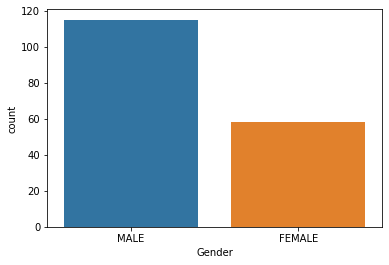

In [9]:
sns.countplot(x='Gender', data=avengers)

<h5>ANALISIS: Jumlah anggota Avengers laki-laki lebih banyak dibandingkan anggota wanita yaitu sebanyak 115 sedangkan anggota wanita berjumlah 58</h5>

<h2>5 Anggota Avengers Paling Sering Tampil</h2>

In [10]:
avengers.sort_values(by=['Appearances'], ascending=False).head(5)[['Name/Alias', 'Appearances']]

,Name/Alias,Appearances
73,Peter Benjamin Parker,4333
6,Steven Rogers,3458
92,"James ""Logan"" Howlett",3130
2,"Anthony Edward ""Tony"" Stark",3068
4,Thor Odinson,2402


<h5>ANALISIS: Diketahui 5 karakter yang paling sering tampil di komik marvel adalah Peter Benjamin Parker (Spiderman), Steven Rogers (Captain America), James "Logan" Howlett (Wolverine), Anthony Edward "Tony" Stark (Iron Man), dan Thor Odinson (Thor) 

<h2>5 Anggota Avengers Paling Senior</h2>

In [11]:
avengers.sort_values(by=['Years since joining'], ascending=False).head(5)[['Name/Alias', 'Years since joining']]

,Name/Alias,Years since joining
0,"Henry Jonathan ""Hank"" Pym",52
1,Janet van Dyne,52
2,"Anthony Edward ""Tony"" Stark",52
3,Robert Bruce Banner,52
4,Thor Odinson,52


<h5>ANALISIS: Diketahui 5 karakter yang paling senior di komik marvel adalah Henry Jonathan "Hank" Pym (Ant-Man), Janet van Dyne (The Wasp), Anthony Edward "Tony" Stark (Iron Man), Robert Bruce Banner (Hulk), Thor Odinson (Thor)

<h2>Jumlah Anggota Avengers Berdasarkan Status Keanggotaannya</h2>

In [12]:
avengers['Honorary'].value_counts()

Full            138
Academy          17
Honorary         16
Probationary      2
Name: Honorary, dtype: int64

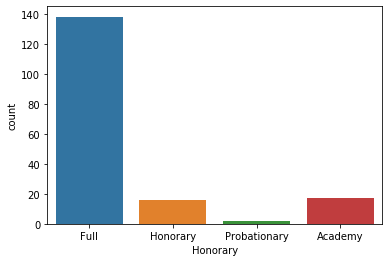

In [13]:
sns.countplot(x='Honorary', data=avengers)

<h5>ANALISIS: Status anggota Avengers yang 'Full' berjumlah 138, 'Honorary' berjumlah 16, 'Probarionary' berjumlah 2, dan 'Academy' berjumlah 17.</h5>

<h2>Sebaran Jumlah Tampil Berdasarkan Status Keanggotaan</h2>

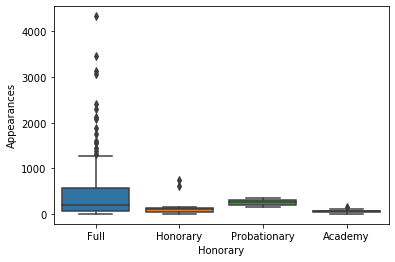

In [14]:
sns.boxplot(x='Honorary', y='Appearances', data=avengers)

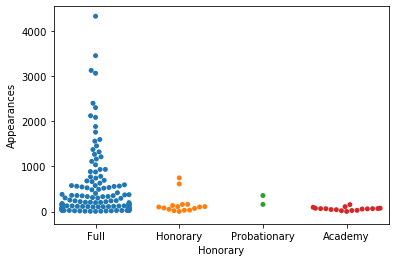

In [15]:
sns.swarmplot(x='Honorary', y='Appearances', data=avengers)

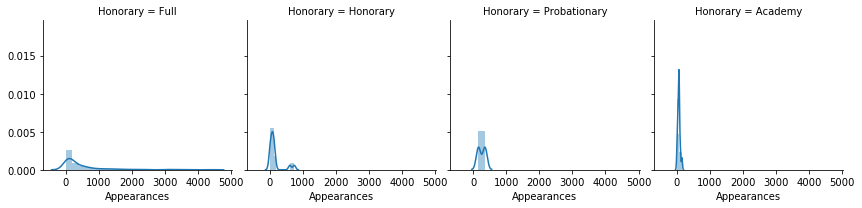

In [16]:
g = sns.FacetGrid(data=avengers, col='Honorary')
g.map(sns.distplot, 'Appearances')

<h2>Korelasi Antara Lamanya Bergabung Dengan Jumlah Tampil</h2>

In [17]:
avengers[['Appearances','Years since joining']].corr(method='pearson')

,Appearances,Years since joining
Appearances,1.000000,0.377827
Years since joining,0.377827,1.000000


<h5>ANALISIS: Nilai kolerasi antara lamanya join dengan jumlah tampil menggunakan metode parson didapat 0.377827 menunjukan tingkat kolerasi antara 2 hal tersebut moderat atau sedang</h5>

Sumber: <a href="https://www.statisticssolutions.com/pearsons-correlation-coefficient/">Kolerasi Pearson</a>

<h2>Sebaran Status Keanggotaan Berdasarkan Lamanya Bergabung</h2>

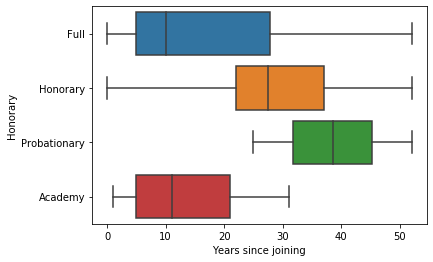

In [18]:
sns.boxplot(y='Honorary', x='Years since joining', data=avengers)

<h2>Distribusi Tahun Anggota Bergabung</h2>

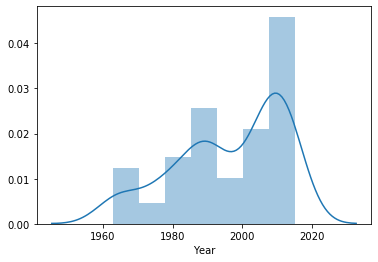

In [19]:
sns.distplot(avengers['Year'])

| 2019 Dicky Faisal Dramar |
| --- |